In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from decisionTree import DecisionTree
from knn import KNN
from svm import SVM, KernelFactory, SMO

In [3]:
# Load the data
data = pd.read_csv('phishing.data', sep=',', header=None)

print(data.shape)

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]


(11055, 31)


30
 1    6157
-1    4898
Name: count, dtype: int64


<Axes: >

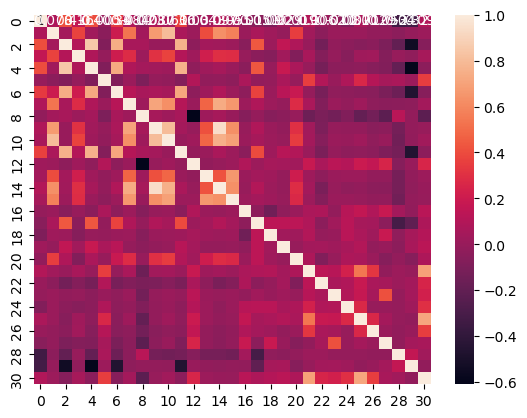

In [4]:
# Simple data analysis

# count the number of each class
print(Y.value_counts())

# find basic correlations
# print(data.corr())

# print the order of the correlation between the features and the class

sns.heatmap(data.corr(), annot=True)


In [10]:
# changing non-binary values to binary

# some features are ternary, we will change them to binary

# duplicate every column that has a value of 0, and change the value of the original column to 1 if it is not 0
for i in range(X.shape[1]):
    if len(X.iloc[:, i].unique()) > 2:
        X = pd.concat([X, X.iloc[:, i]], axis=1)
        X.iloc[:, -1] = X.iloc[:, -1].apply(lambda x: 1 if x != 0 else -1)
        X.iloc[:, i] = X.iloc[:, i].apply(lambda x: 1 if x == 1 else -1)

# replace all 0 values with -1
X = X.replace(0, -1)

#create order of the features by correlation
order = X.corrwith(Y).abs().sort_values(ascending=False).index

<Axes: >

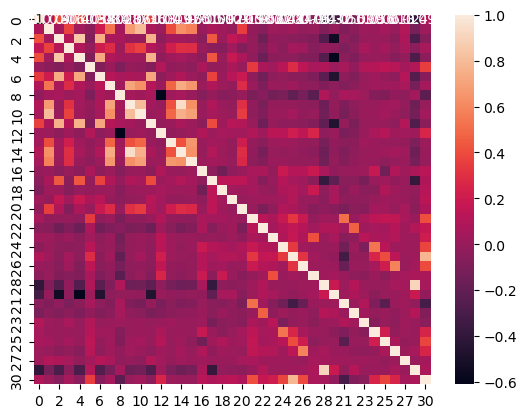

In [14]:
# Another one corelation matrix of X and Y

data2 = pd.concat([X, Y], axis=1)

sns.heatmap(data2.corr(), annot=True)

In [8]:
# X_val was used for searching for the best hyperparameters. Replace X_tv with X_val if you want to do it

X_tv, X_test, Y_tv, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# testing SVM algorithm

kernel = KernelFactory.create_kernel('linear')

# model = SMO(kernel, 1, 0.001)
model = SVM(kernel, 10000, 0.001)

mean_accuracy = 0 

for i in range(5):
    X_train, X_val, Y_train, Y_val = train_test_split(X_tv, Y_tv, test_size=0.2, random_state=42)
    model.fit(X_train, Y_train)
    mean_accuracy += model.score(X_val, Y_val)    
    print("Accuracy on validation set: ", model.score(X_val, Y_val))  
      
mean_accuracy /= 5

print("Mean accuracy on validation set: ", mean_accuracy)


In [ ]:
# testing SMO algorithm

X_train, X_val, Y_train, Y_val = train_test_split(X_tv, Y_tv, test_size=0.2, random_state=42)

kernel1 = KernelFactory.create_kernel('rbf', {'gamma': 2})

kernel2 = KernelFactory.create_kernel('polynomial', {'degree': 2, 'coef': 5})

kernel3 = KernelFactory.create_kernel('sigmoid', {'coef': 2})


# model = SMO(kernel1, 150, 0.01)

# model.fit(X_train, Y_train, X_val, Y_val)
    
# print("Accuracy on validation set: ", model.score(X_val, Y_val))

model = SMO(kernel, 50, 0.001)

model.fit(X_train, Y_train, X_val, Y_val)
    
print("Accuracy on validation set: ", model.score(X_val, Y_val))

model = SMO(kernel3, 900, 0.0001)

model.fit(X_train, Y_train, X_val, Y_val)
    
print("Accuracy on validation set: ", model.score(X_val, Y_val))


In [ ]:
# Best performing SMO:
model = SMO(kernel3, 75000, 0.01)

model.fit(X_tv, Y_tv, X_test, Y_test)

print("Accuracy on test set: ", model.score(X_test, Y_test))

In [9]:
# testing DecisionTree

for i in range(2,7,1):
    print("Depth: ", i**2)
    model1 = DecisionTree(i**2, 'gini')
    model2 = DecisionTree(i**2, 'entropy')
    model3 = DecisionTree(i**2, 'error')
    model1.fit(X_tv, Y_tv)
    model2.fit(X_tv, Y_tv)
    model3.fit(X_tv, Y_tv)
    print(model1.score(X_test, Y_test))
    print(model2.score(X_test, Y_test))
    print(model3.score(X_test, Y_test))
    print("Best performing feature of gini: ",model1.best_feature())
    print("Best performing feature of entropy: ",model2.best_feature())
    print("Best performing feature of error: ",model3.best_feature())
    
# Best performing feature:

    

Depth:  4
91.63274536408865
92.08502939846224
90.27589326096789
Best performing feature of gini:  25
Best performing feature of entropy:  25
Best performing feature of error:  25
Depth:  9
94.12030755314338
94.70827679782904
90.32112166440524
Best performing feature of gini:  25
Best performing feature of entropy:  25
Best performing feature of error:  25
Depth:  16
95.34147444595206
95.61284486657621
90.32112166440524
Best performing feature of gini:  25
Best performing feature of entropy:  25
Best performing feature of error:  25
Depth:  25
95.34147444595206
95.74853007688829
90.32112166440524
Best performing feature of gini:  25
Best performing feature of entropy:  25
Best performing feature of error:  25
Depth:  36
95.34147444595206
95.74853007688829
90.32112166440524
Best performing feature of gini:  25
Best performing feature of entropy:  25
Best performing feature of error:  25


In [ ]:
# plotting the decision tree results
depths = [1,2,4,8,16,32,64,128]

accuracy_entropy = []
accuracy_gini = []
accuracy_error = []

for i in depths:
    acc_entropy = []
    acc_gini = []
    acc_error = []
    for j in range(5):
        model1 = DecisionTree(i, 'entropy')
        model2 = DecisionTree(i, 'gini')
        model3 = DecisionTree(i, 'error')
        
        X_train, X_val, Y_train, Y_val = train_test_split(X_tv, Y_tv, test_size=0.2, random_state=42)
        
        model1.fit(X_train, Y_train)
        model2.fit(X_train, Y_train)
        model3.fit(X_train, Y_train)
        
        acc_entropy.append(model1.score(X_test, Y_test))
        acc_gini.append(model2.score(X_test, Y_test))
        acc_error.append(model3.score(X_test, Y_test))
        
    accuracy_entropy.append(np.mean(acc_entropy))
    accuracy_gini.append(np.mean(acc_gini))
    accuracy_error.append(np.mean(acc_error))
    
    
plt.plot(depths, accuracy_entropy, label='entropy')
plt.plot(depths, accuracy_gini, label='gini')
plt.plot(depths, accuracy_error, label='error')

plt.xlabel('Depth')
plt.ylabel('Accuracy')

plt.legend()
plt.show()
        


In [19]:
# testing kNN

X_transf = X_tv.copy()

# print(X_transf.shape)
# print(len(order))

for i in range(X_transf.shape[1]):
    X_transf.iloc[:, i] = X_transf.iloc[:, i] * (50 - order[i])

accuracy_euclidean = []
accuracy_manhattan = []
accuracy_l_inf = []
accuracy_adam = []

for i in range(1, 129, 8):
    # X_train, X_val, Y_train, Y_val = train_test_split(X_transf, Y_tv, test_size=0.2, random_state=42)
    X_train, X_val, Y_train, Y_val = train_test_split(X_tv, Y_tv, test_size=0.2, random_state=42)
    print("Number of neighbours: ", i)
    model = KNN(i,'euclidean')
    model2 = KNN(i, 'manhattan')
    model3 = KNN(i, 'l_inf')
    model4 = KNN(i, 'adam')
    model.fit(X_train, Y_train)
    model2.fit(X_train, Y_train)
    model3.fit(X_train, Y_train)
    model4.fit(X_train, Y_train)
    print(model.score(X_test, Y_test))
    print(model2.score(X_test, Y_test))
    print(model3.score(X_test, Y_test))
    print(model4.score(X_test, Y_test))
    accuracy_euclidean.append(model.score(X_test, Y_test))
    accuracy_manhattan.append(model2.score(X_test, Y_test))
    accuracy_l_inf.append(model3.score(X_test, Y_test))
    accuracy_adam.append(model4.score(X_test, Y_test))



Number of neighbours:  1
96.15558570782451
96.15558570782451
76.88828584350973
96.15558570782451
Number of neighbours:  9
94.57259158751697
94.57259158751697
80.05427408412483


KeyboardInterrupt: 

In [ ]:
plt.plot(range(1, 129, 8), accuracy_euclidean, label='euclidean')
plt.plot(range(1, 129, 8), accuracy_manhattan, label='manhattan')
plt.plot(range(1, 129, 8), accuracy_l_inf, label='l_inf')
plt.plot(range(1, 129, 8), accuracy_adam, label='adam')

plt.xlabel('k')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [ ]:
# testing knn with promising tendencies (failed)
for i in range(150, 300, 30):
    X_train, X_val, Y_train, Y_val = train_test_split(X_tv, Y_tv, test_size=0.2, random_state=42)

    model = KNN(i+1, 'l_inf')
    
    model.fit(X_train, Y_train)
    
    print(model.score(X_val, Y_val))
    

In [20]:
X_train, X_val, Y_train, Y_val = train_test_split(X_tv, Y_tv, test_size=0.2, random_state=42)

# multiply each feature by its position in the order of correlation (reversed, just to check)
X_transf = X_train * (50 - order)
X_val_transf = X_val * (50 - order)
#check the results
# for i in range(X_transf.shape[1]):
    # print(X_transf.iloc[:, i].value_counts())

model = KNN(1, 'l_inf')

model.fit(X_transf, Y_train)

print(model.score(X_val_transf, Y_val))

model = KNN(1, 'euclidean')

model.fit(X_transf, Y_train)

print(model.score(X_val_transf, Y_val))

model = KNN(1, 'manhattan')

model.fit(X_transf, Y_train)

print(model.score(X_val_transf, Y_val))

model = KNN(1, 'adam')

model.fit(X_transf, Y_train)

print(model.score(X_val_transf, Y_val))


92.70774448841154
95.08196721311475
96.1560203504805
95.92990390050876


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# benchmarks from sklearn

X_train, X_val, Y_train, Y_val = train_test_split(X_tv, Y_tv, test_size=0.2, random_state=42)

# SVM

model = SVC(kernel='linear', C=1, tol=0.001)
model2 = SVC(kernel='rbf', C=1, tol=0.001)
model3 = SVC(kernel='poly', C=1, tol=0.001)

model.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)

print('SVM, linear kernel: ', model.score(X_val, Y_val)*100)
print('SVM, rbf kernel: ', model2.score(X_val, Y_val)*100)
print('SVM, polynomial kernel: ', model3.score(X_val, Y_val)*100)
# DecisionTree

model = DecisionTreeClassifier(max_depth=32, criterion='gini')

model.fit(X_train, Y_train)

print("Decision Tree: ", model.score(X_test, Y_test)*100)

# Random Forest

model = RandomForestClassifier(n_estimators=100, criterion='gini')

model.fit(X_train, Y_train)

print("random forest:", model.score(X_test, Y_test)*100)

# kNN

model = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

model.fit(X_train, Y_train)

print("kNN: ", model.score(X_test, Y_test)*100)


